In [519]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from scipy import linalg

In [520]:
PCA_model_accu=[]

In [521]:
features=['family','product-type','steel','carbon','hardness','temper_rolling','condition','formability','strength','non-ageing','surface-finish','surface-quality','enamelability','bc','bf','bt','bw/me','bl','m','chrom','phos','cbond','marvi','exptl','ferro','corr','blue/bright/varn/clean','lustre','jurofm','s','p','shape','thick','width','len','oil','bore','packing','classes']

In [522]:
dataset=pd.read_csv('/content/drive/MyDrive/Data_PRML/anneal.data',names=features)

In [523]:
X_test=pd.read_csv('/content/drive/MyDrive/Data_PRML/anneal.test',names=['family','product-type','steel','carbon','hardness','temper_rolling','condition','formability','strength','non-ageing','surface-finish','surface-quality','enamelability','bc','bf','bt','bw/me','bl','m','chrom','phos','cbond','marvi','exptl','ferro','corr','blue/bright/varn/clean','lustre','jurofm','s','p','shape','thick','width','len','oil','bore','packing'])

In [524]:
X_test.head()

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,jurofm,s,p,shape,thick,width,len,oil,bore,packing
?,C,A,0,45,?,S,?,0,?,?,...,?,?,COIL,1.600,610.0,0,?,0,?,3
?,C,A,0,0,?,S,3,0,N,?,...,?,?,COIL,0.699,609.9,0,?,0,?,3
ZS,C,A,0,85,T,?,?,0,?,?,...,?,?,SHEET,0.400,610.0,762,?,0,?,U
ZS,C,A,0,50,T,?,?,0,?,?,...,?,?,COIL,0.400,610.0,0,?,0,?,3
?,C,A,0,0,?,S,2,0,?,?,...,?,?,COIL,0.699,1320.0,0,?,0,?,3


In [525]:
dataset.head(13)

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3
5,?,C,A,0,45,?,S,?,0,?,...,?,?,COIL,1.600,610.0,0,?,0,?,3
6,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.699,610.0,4880,Y,0,?,3
7,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,3.300,152.0,0,?,0,?,3
8,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,0.699,1320.0,0,?,0,?,3
9,?,C,A,0,0,?,S,3,0,N,...,?,?,SHEET,1.000,1320.0,762,?,0,?,3


In [526]:
dataset.replace(['?'],np.NaN, inplace=True)

In [527]:
X_test.replace(['?'],np.NaN, inplace=True)

In [528]:
dataset.head()

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,NaN,C,A,8,0,NaN,S,NaN,0,NaN,...,NaN,NaN,COIL,0.700,610.0,0,NaN,0,NaN,3
1,NaN,C,R,0,0,NaN,S,2,0,NaN,...,NaN,NaN,COIL,3.200,610.0,0,NaN,0,NaN,3
2,NaN,C,R,0,0,NaN,S,2,0,NaN,...,NaN,NaN,SHEET,0.700,1300.0,762,NaN,0,NaN,3
3,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,COIL,2.801,385.1,0,NaN,0,NaN,3
4,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,SHEET,0.801,255.0,269,NaN,0,NaN,3


In [529]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   family                  111 non-null    object 
 1   product-type            798 non-null    object 
 2   steel                   728 non-null    object 
 3   carbon                  798 non-null    int64  
 4   hardness                798 non-null    int64  
 5   temper_rolling          123 non-null    object 
 6   condition               527 non-null    object 
 7   formability             515 non-null    object 
 8   strength                798 non-null    int64  
 9   non-ageing              95 non-null     object 
 10  surface-finish          8 non-null      object 
 11  surface-quality         581 non-null    object 
 12  enamelability           13 non-null     object 
 13  bc                      1 non-null      object 
 14  bf                      118 non-null    ob

In [530]:
dataset=dataset[['product-type','steel','carbon','hardness','strength','shape','thick','width','len','bore','classes']]

In [531]:
dataset.head()

,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore,classes
0,C,A,8,0,0,COIL,0.700,610.0,0,0,3
1,C,R,0,0,0,COIL,3.200,610.0,0,0,3
2,C,R,0,0,0,SHEET,0.700,1300.0,762,0,3
3,C,A,0,60,0,COIL,2.801,385.1,0,0,3
4,C,A,0,60,0,SHEET,0.801,255.0,269,0,3


In [532]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product-type  798 non-null    object 
 1   steel         728 non-null    object 
 2   carbon        798 non-null    int64  
 3   hardness      798 non-null    int64  
 4   strength      798 non-null    int64  
 5   shape         798 non-null    object 
 6   thick         798 non-null    float64
 7   width         798 non-null    float64
 8   len           798 non-null    int64  
 9   bore          798 non-null    int64  
 10  classes       798 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 68.7+ KB


In [533]:
dataset.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [534]:
X_test.dropna(inplace=True)

In [535]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 797
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product-type  728 non-null    object 
 1   steel         728 non-null    object 
 2   carbon        728 non-null    int64  
 3   hardness      728 non-null    int64  
 4   strength      728 non-null    int64  
 5   shape         728 non-null    object 
 6   thick         728 non-null    float64
 7   width         728 non-null    float64
 8   len           728 non-null    int64  
 9   bore          728 non-null    int64  
 10  classes       728 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 68.2+ KB


In [536]:
main_val=list(dataset['product-type'].unique())
for val in main_val:
  dataset.loc[dataset['product-type']==val,'product-type']=int(main_val.index(val))
  

In [537]:
main_val=list(dataset['steel'].unique())
for val in main_val:
  dataset.loc[dataset['steel']==val,'steel']=int(main_val.index(val))
  

In [538]:
main_val=list(dataset['shape'].unique())
for val in main_val:
  dataset.loc[dataset['shape']==val,'shape']=int(main_val.index(val))
  

In [539]:
dataset['product-type']=dataset['product-type'].astype(int)

In [540]:
dataset['steel']=dataset['steel'].astype(int)

In [541]:
dataset['shape']=dataset['shape'].astype(int)

In [542]:
dataset.steel.value_counts()

0    397
1    231
2     44
4     17
5     17
6     13
3      9
Name: steel, dtype: int64

In [543]:
train_ratio=0.65
val_ratio=0.35
dataX=dataset[['steel','carbon','hardness','strength','shape','thick','width','len','bore']]
dataY=dataset['classes']
x_train, x_val, y_train, y_val = tts(dataX, dataY, test_size=1 - train_ratio)

In [544]:
x_train.shape[0]

473

In [545]:
x_val.shape[0]

255

In [546]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train,y_train)
prid=clf.predict(x_val)
print("The accuracy for random forest classifier is:",accuracy_score(prid,y_val))
print(classification_report(prid,y_val))
scores1 = cross_val_score(clf, x_val, y_val, cv=5)

The accuracy for random forest classifier is: 0.8901960784313725
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.85      0.83      0.84        35
           3       0.92      0.93      0.93       193
           5       0.50      0.50      0.50        16
           U       1.00      1.00      1.00         8

    accuracy                           0.89       255
   macro avg       0.86      0.79      0.81       255
weighted avg       0.89      0.89      0.89       255



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


In [547]:
from sklearn.naive_bayes import GaussianNB as GNB
clf = GNB()
clf.fit(x_train,y_train)
prid=clf.predict(x_val)
print("The accuracy for Gaussian  classifier is:",accuracy_score(prid,y_val))
print(classification_report(prid,y_val))
scores2 = cross_val_score(clf, x_val, y_val, cv=5)

The accuracy for Gaussian  classifier is: 0.3137254901960784
              precision    recall  f1-score   support

           1       1.00      0.09      0.17        22
           2       0.94      0.46      0.62        70
           3       0.11      1.00      0.20        22
           5       1.00      0.18      0.30        89
           U       1.00      0.15      0.27        52

    accuracy                           0.31       255
   macro avg       0.81      0.38      0.31       255
weighted avg       0.91      0.31      0.36       255



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


In [548]:
from sklearn.naive_bayes import MultinomialNB as MNB
clf = MNB()
clf.fit(x_train,y_train)
prid=clf.predict(x_val)
print("The accuracy for multinomial classifier is:",accuracy_score(prid,y_val))
print(classification_report(prid,y_val))


The accuracy for multinomial classifier is: 0.12941176470588237
              precision    recall  f1-score   support

           1       1.00      0.02      0.05        83
           2       0.35      0.26      0.30        47
           3       0.05      0.90      0.09        10
           5       0.19      0.08      0.11        37
           U       0.88      0.09      0.16        78

    accuracy                           0.13       255
   macro avg       0.49      0.27      0.14       255
weighted avg       0.69      0.13      0.14       255



In [549]:
from sklearn.tree import DecisionTreeClassifier as DT
clf = DT(random_state=0)
clf.fit(x_train,y_train)
prid=clf.predict(x_val)
print("The accuracy for decision tree classifier is:",accuracy_score(prid,y_val))
print(classification_report(prid,y_val))
scores3 = cross_val_score(clf, x_val, y_val, cv=5)

The accuracy for decision tree classifier is: 0.9058823529411765
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.88      0.81      0.85        37
           3       0.94      0.94      0.94       195
           5       0.56      0.64      0.60        14
           U       0.88      1.00      0.93         7

    accuracy                           0.91       255
   macro avg       0.85      0.88      0.86       255
weighted avg       0.91      0.91      0.91       255



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


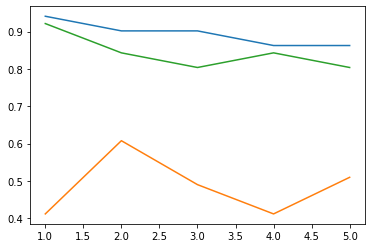

In [550]:
x=[i for i in range(1,6,1)]
plt.plot(x,scores1)
plt.plot(x,scores2)
plt.plot(x,scores3)
plt.xlabel='folds'
plt.ylabel='accuracy'

In [551]:
def Covariance(X_df):
    X = X_df.values
    N, M = X.shape
    print(N,M)
    cov = np.zeros((M, M))
    for i in range(M):
        mean_i = np.sum(X[:, i]) / N
        for j in range(M):
            mean_j = np.sum(X[:, j]) / N
            cov[i, j] = np.sum((X[:, i] - mean_i) * (X[:, j] - mean_j)) / (N - 1)
    return cov


In [552]:
class PCA():
  def __init__(self,dataset,n_comp):
    self.X=dataset
    self.num_components=n_comp
    self.vectors=None
  
  def get_mean(self):
    mean=[]
    features=list(self.X.columns)
    for feature in features:
      mean.append(self.X[feature].sum()/self.X.shape[0])
    return mean

  def centralize(self):
    features=list(self.X.columns)
    for feature in features:
      mean=self.X[feature].mean()
      std=self.X[feature].std()
      self.X[feature]=self.X[feature]-mean
      self.X[feature]=self.X[feature]/std
    return self.X

  def get_covariance(self):
    Cov=[]
    features=list(self.X.columns)
    for feature in features:
      feature1=feature
      List=[]
      for remaining_feature in features:
        feature2=remaining_feature
        List.append(cov(dataset,feature1,feature2))
      Cov.append(List)
    return Cov     

  def eigen_decomposition(self):
    eigen_values , eigen_vectors = linalg.eigh(Covariance(self.centralize()))  
    return eigen_values,eigen_vectors

  def power_iteration(self,A):    
    n,d=A.shape
    x=np.ones([d,1])
    priv=0
    for i in range(8):
        inp_A=np.dot(A,x)
        Max=np.max(inp_A)
        Min=np.min(inp_A)
        lamda=0
        if(Min<0):
            p=Min*(-1)
            if(p>Max):
                lamda=Min
            else:
                lamda=Max
        else:
            lamda=Max        
        x=inp_A/lamda
        priv=lamda
    return priv,x

  def ed(self):
    A=Covariance(self.centralize())
    n,d=A.shape
    eigenvalue=[]
    eignvector=[]
    priv=0
    v=None
    L=0
    for i in range(d):
        if(i!=0):
            extra_term=extra_term=((np.dot(v,v.transpose()))*L)/np.dot(v.transpose(),v)
            A=np.subtract(A,extra_term)
        L,v=self.power_iteration(A)
        eigenvalue.append(L)
        eignvector.append(v)
    return np.array(eignvector),np.array(eigenvalue)


  def transform(self):
    sorted_index=np.argsort(self.ed()[1])[::-1]
    sorted_eigenvalue = self.ed()[1][sorted_index]
    sorted_eigenvectors = self.ed()[0][sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:self.num_components]
    X_reduced = np.dot(eigenvector_subset.transpose() , self.centralize().transpose() ).transpose()
    return X_reduced


In [553]:
dt=dataset[['steel','carbon','hardness','strength','shape','thick','width','len','bore']]
clf=PCA(dt,2)
t=clf.transform()
t

728 9
728 9
728 9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array([[[ 0.18252128],
        [-1.77120813]],

       [[ 0.9278175 ],
        [ 0.82512007]],

       [[-0.7329821 ],
        [-0.61255329]],

       ...,

       [[-0.54678559],
        [-2.46873556]],

       [[-0.22747578],
        [ 2.07456625]],

       [[-1.14591852],
        [ 0.75581824]]])

In [554]:
t=t.reshape([728,2])

In [555]:
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(t , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(dataset['classes'])] ,axis = 1)

In [556]:
principal_df


,PC1,PC2,classes
0,0.182521,-1.771208,3
1,0.927818,0.825120,3
2,-0.732982,-0.612553,3
3,2.574999,-0.609869,3
4,1.454135,-1.217763,3
...,...,...,...
792,NaN,NaN,3
793,NaN,NaN,3
795,NaN,NaN,3
796,NaN,NaN,3


In [557]:
principal_df=principal_df.dropna()

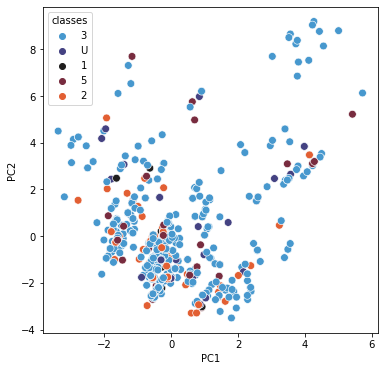

In [558]:
import seaborn as sb
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'classes' , s = 60 , palette= 'icefire')


In [559]:
train_ratio=0.65
val_ratio=0.35
dataX=principal_df[['PC1','PC2']]
dataY=principal_df['classes']
x_train, x_val, y_train, y_val = tts(dataX, dataY, test_size=1 - train_ratio)

In [560]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train,y_train)
prid=clf.predict(x_val)
scores1 = cross_val_score(clf, x_val, y_val, cv=5)
print("The accuracy for random forest classifier is:",accuracy_score(prid,y_val))
print(classification_report(prid,y_val))
print(confusion_matrix(prid,y_val))
PCA_model_accu.append(accuracy_score(prid,y_val))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


The accuracy for random forest classifier is: 0.7264957264957265
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.14      0.21      0.17        14
           3       0.90      0.81      0.85       206
           5       0.08      0.12      0.10         8
           U       0.00      0.00      0.00         3

    accuracy                           0.73       234
   macro avg       0.22      0.23      0.22       234
weighted avg       0.80      0.73      0.76       234

[[  0   1   2   0   0]
 [  0   3  10   1   0]
 [  1  17 166  10  12]
 [  1   0   6   1   0]
 [  0   1   1   1   0]]


In [561]:
from sklearn.naive_bayes import GaussianNB as GNB
clf = GNB()
clf.fit(x_train,y_train)
prid=clf.predict(x_val)
scores2 = cross_val_score(clf, x_val, y_val, cv=5)
print("The accuracy for Gaussian  classifier is:",accuracy_score(prid,y_val))
print(classification_report(prid,y_val))
PCA_model_accu.append(accuracy_score(prid,y_val))

The accuracy for Gaussian  classifier is: 0.7777777777777778
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.98      0.79      0.88       231
           5       0.00      0.00      0.00         3
           U       0.00      0.00      0.00         0

    accuracy                           0.78       234
   macro avg       0.20      0.16      0.18       234
weighted avg       0.97      0.78      0.86       234



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_divi

In [562]:
from sklearn.tree import DecisionTreeClassifier as DT
clf = DT(random_state=0)
clf.fit(x_train,y_train)
prid=clf.predict(x_val)
print("The accuracy for decision tree classifier is:",accuracy_score(prid,y_val))
scores3 = cross_val_score(clf, x_val, y_val, cv=5)
print(classification_report(prid,y_val))
PCA_model_accu.append(accuracy_score(prid,y_val))

The accuracy for decision tree classifier is: 0.6153846153846154
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.14      0.08      0.10        38
           3       0.76      0.82      0.79       173
           5       0.00      0.00      0.00        13
           U       0.00      0.00      0.00         6

    accuracy                           0.62       234
   macro avg       0.18      0.18      0.18       234
weighted avg       0.59      0.62      0.60       234



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


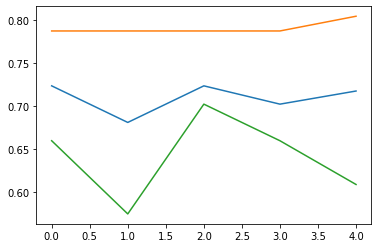

In [563]:
x=[i for i in range(0,5,1)]
plt.plot(x,scores1)
plt.plot(x,scores2)
plt.plot(x,scores3)

In [564]:
L=[]
for i in range(1,9,1):
  dt=dataset[['steel','carbon','hardness','strength','shape','thick','width','len','bore']]
  clf=PCA(dt,i)
  t=clf.transform()
  t=t.reshape([728,i])
#Creating a Pandas DataFrame of reduced Dataset
  principal_df = pd.DataFrame(t , columns = [j for j in range(i)])
 
#Concat it with target variable to create a complete Dataset
  principal_df = pd.concat([principal_df , pd.DataFrame(dataset['classes'])] ,axis = 1)
  principal_df=principal_df.dropna()
  train_ratio=0.65
  val_ratio=0.35
  dataX=principal_df[[j for j in range(i)]]
  dataY=principal_df['classes']
  x_train, x_val, y_train, y_val = tts(dataX, dataY, test_size=1 - train_ratio)

  from sklearn.ensemble import RandomForestClassifier
  from sklearn.model_selection import cross_val_score
  from sklearn.metrics import classification_report,confusion_matrix
  clf = RandomForestClassifier(random_state=0)
  clf.fit(x_train,y_train)
  prid=clf.predict(x_val)
  L.append(accuracy_score(prid,y_val))
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


728 9
728 9
728 9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


728 9
728 9
728 9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


728 9
728 9
728 9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


728 9
728 9
728 9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


728 9
728 9
728 9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


728 9
728 9
728 9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


728 9
728 9
728 9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


728 9
728 9
728 9


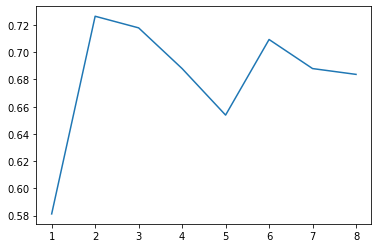

In [565]:
plt.plot([i for i in range(1,9,1)],L)

# New Section

In [566]:
class LDA():
  def __init__(self,n_components):
    self.components=n_components
    self.linear_disriminants=None

  def select_LD(self,X,y):
    SW,SB=self.S_W_S_B(X,y)
    A=np.linalg.inv(SW).dot(SB)
    eigenvalues,eigenvectors=np.linalg.eig(A)
    eigenvectors=eigenvectors.T
    idxs = np.argsort(abs(eigenvalues))[::-1]
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]
    self.linear_discriminants = eigenvectors[0 : self.components]    


  def S_W_S_B(self,X,y):
    n_features=X.shape[1]
    class_labels=list(y['classes'].unique())
    mean_overall = np.mean(X, axis=0)
    SW = np.zeros((n_features, n_features))
    SB = np.zeros((n_features, n_features))
    for c in class_labels:
      X_c = X[y['classes'] == c]
      mean_c = np.mean(X_c, axis=0)
      SW += (X_c - mean_c).T.dot((X_c - mean_c))
      n_c = X_c.shape[0]
      print(np.array((mean_c - mean_overall)))
      mean_diff = np.array((mean_c - mean_overall)).reshape(n_features, 1)
      SB += n_c * (mean_diff).dot(mean_diff.T)      
    return SW,SB  

  def transform(self, X):
    return np.dot(X, self.linear_discriminants.T)

In [567]:
LDA_model_accu=[]

In [568]:
cls=LDA(2)
y=pd.DataFrame(dataset['classes'])
y.columns=['classes']
cls.select_LD(dt,y)
t=cls.transform(dt)

[-0.06244489  0.07934644 -0.05119739 -0.0644795  -0.05122663 -0.03283126
 -0.01899875 -0.00397619  0.02989782]
[-0.61802233 -0.23267126  2.72818183 -0.26018476 -0.25678118  0.68613422
  0.0795632  -0.30541525  0.42918441]
[ 1.03896302 -0.24770344 -0.47826599  2.99089277 -1.08236911 -0.45398088
 -0.74504834 -0.67692138 -0.23384364]
[-0.61802233 -0.27413934 -0.47826599 -0.26018476  0.07607491 -0.19079841
 -0.38799025 -0.16370103 -0.23384364]
[ 0.93186665 -0.27413934 -0.47826599  0.40414782  0.52658092  0.0898113
  0.38708766  0.31349018 -0.23384364]


In [569]:
t=t.real

In [570]:
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(t , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(dataset['classes'])] ,axis = 1)

In [571]:
principal_df=principal_df.dropna()

In [572]:
principal_df

,PC1,PC2,classes
0,-0.564460,-1.073507,3
1,0.059663,0.171685,3
2,-0.495394,0.545976,3
3,2.250287,-0.137176,3
4,1.722046,-0.042856,3
...,...,...,...
723,-0.527088,-0.068007,3
724,1.318381,-0.678212,3
725,-0.698236,-0.964146,3
726,0.080885,0.084006,2


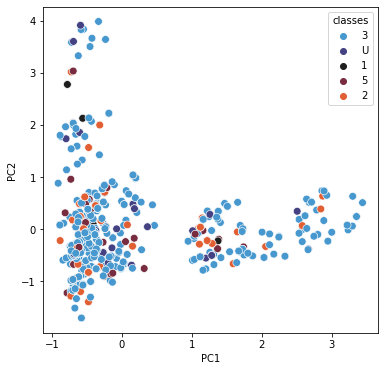

In [573]:
import seaborn as sb
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'classes' , s = 60 , palette= 'icefire')


In [574]:
train_ratio=0.65
val_ratio=0.35
dataX=principal_df[['PC1','PC2']]
dataY=principal_df['classes']
x_train, x_val, y_train, y_val = tts(dataX, dataY, test_size=1 - train_ratio)

In [575]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train,y_train)
prid=clf.predict(x_val)
scores1 = cross_val_score(clf, x_val, y_val, cv=5)
print("The accuracy for random forest classifier is:",accuracy_score(prid,y_val))
print(classification_report(prid,y_val))
print(confusion_matrix(prid,y_val))
print(scores1)
LDA_model_accu.append(accuracy_score(prid,y_val))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


The accuracy for random forest classifier is: 0.6837606837606838
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00        18
           3       0.87      0.78      0.82       205
           5       0.00      0.00      0.00         5
           U       0.00      0.00      0.00         6

    accuracy                           0.68       234
   macro avg       0.17      0.16      0.16       234
weighted avg       0.76      0.68      0.72       234

[[  0   0   0   0   0]
 [  0   0  16   0   2]
 [  4  22 160   8  11]
 [  0   1   4   0   0]
 [  0   0   4   2   0]]
[0.65957447 0.70212766 0.72340426 0.74468085 0.76086957]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [576]:
from sklearn.naive_bayes import GaussianNB as GNB
clf = GNB()
clf.fit(x_train,y_train)
prid=clf.predict(x_val)
scores2 = cross_val_score(clf, x_val, y_val, cv=5)
print("The accuracy for Gaussian  classifier is:",accuracy_score(prid,y_val))
print(classification_report(prid,y_val))
LDA_model_accu.append(accuracy_score(prid,y_val))

The accuracy for Gaussian  classifier is: 0.7777777777777778
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.98      0.79      0.88       229
           5       0.00      0.00      0.00         0
           U       0.08      0.20      0.11         5

    accuracy                           0.78       234
   macro avg       0.21      0.20      0.20       234
weighted avg       0.96      0.78      0.86       234



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_divi

In [577]:
from sklearn.tree import DecisionTreeClassifier as DT
clf = DT(random_state=0)
clf.fit(x_train,y_train)
prid=clf.predict(x_val)
print("The accuracy for decision tree classifier is:",accuracy_score(prid,y_val))
scores3 = cross_val_score(clf, x_val, y_val, cv=5)
print(classification_report(prid,y_val))
LDA_model_accu.append(accuracy_score(prid,y_val))

The accuracy for decision tree classifier is: 0.5897435897435898
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.09      0.06      0.07        34
           3       0.73      0.78      0.76       173
           5       0.00      0.00      0.00        12
           U       0.08      0.07      0.07        15

    accuracy                           0.59       234
   macro avg       0.18      0.18      0.18       234
weighted avg       0.56      0.59      0.57       234



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_divi

In [578]:
LDA_model_accu

[0.6837606837606838, 0.7777777777777778, 0.5897435897435898]

In [579]:
PCA_model_accu

[0.7264957264957265, 0.7777777777777778, 0.6153846153846154]

In [580]:
Random_forest_classifier=[LDA_model_accu[0],PCA_model_accu[0]]
Gaussian=[LDA_model_accu[1],PCA_model_accu[1]]
Decision_tree=[LDA_model_accu[2],PCA_model_accu[2]]

In [581]:
table=pd.DataFrame([Random_forest_classifier,Gaussian],index=['Random Forest','Gaussian'],columns=['LDA','PCA'])

In [582]:
table

,LDA,PCA
Random Forest,0.683761,0.726496
Gaussian,0.777778,0.777778


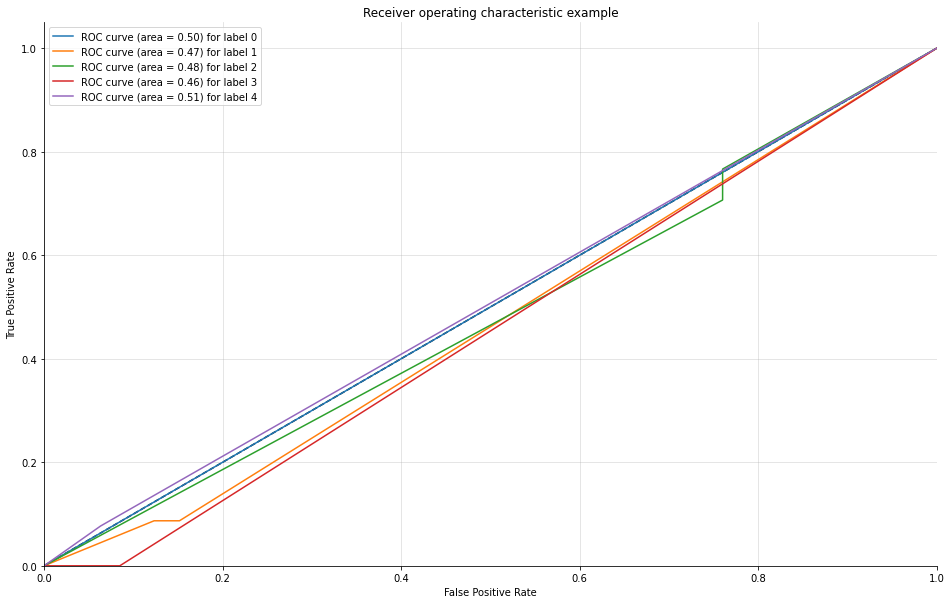

In [583]:
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(clf, x_val, y_val, n_classes=5, figsize=(16, 10))